__Задание__
1. Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями
2. Добавьте первые разности по стоимости доллара и евро к рублю (можно добавить и сами курсы валют - прошлые значения)
3. Cделайте ее перрасчет (ресемплинг) в представление по неделям.
4. Постройте модель предсказания 1-й точки от текущей (h=1).

5. Сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product

%matplotlib inline
import warnings 

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX


__1__ Прочитайте базу my_BRENT2019.csv...

In [2]:
data = pd.read_csv('my_BRENT2019.csv', index_col=[0])
data.sort_index(inplace=True)
data.index = pd.to_datetime(data.index)
data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


__2__ сделайте ее перрасчет (ресемплинг) в представление по неделям.

In [3]:
data_w = data.resample('w').mean()

__1__ и перейдите к представлению ряда первыми разностями

In [4]:
data_w['d_brent'] = data_w['Значение'].diff(1)
data_w.dropna(inplace=True)  
data_w


,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,d_brent
Дата,,,,,,,,,,,,
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.000000,0.166667,1.057333
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.000000,0.000000,1.020000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.000000,0.000000,-0.175000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.000000,0.000000,2.693333
2010-10-10,84.146667,2010.0,10.000000,6.666667,4.000000,279.666667,40.0,2.666667,0.000000,0.166667,0.000000,2.935000
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-04,62.791667,2019.0,7.500000,16.166667,3.000000,212.666667,31.0,2.666667,0.000000,0.000000,0.000000,-0.526667
2019-08-11,58.236667,2019.0,8.000000,7.666667,3.000000,219.666667,32.0,2.666667,0.000000,0.000000,0.000000,-4.555000
2019-08-18,59.033333,2019.0,8.000000,14.666667,3.000000,226.666667,33.0,2.666667,0.000000,0.000000,0.000000,0.796667


In [5]:
curency = pd.read_excel('curency.xlsx',sep=';',index_col=[0], parse_dates=[0], dayfirst=True)
curency.index = pd.to_datetime(curency.index)
#curency = euro.astype(float)
euro = curency.copy().loc[curency['type']=='euro']
euro.drop(columns=['type'], inplace=True)
euro = euro.astype(float)
usd = curency.copy().loc[curency['type']=='usd']
usd.drop(columns=['type'], inplace=True)
usd = usd.astype(float)

euro = euro.rename(columns={'curs': 'euro'})
usd = usd.rename(columns={'curs': 'usd'})

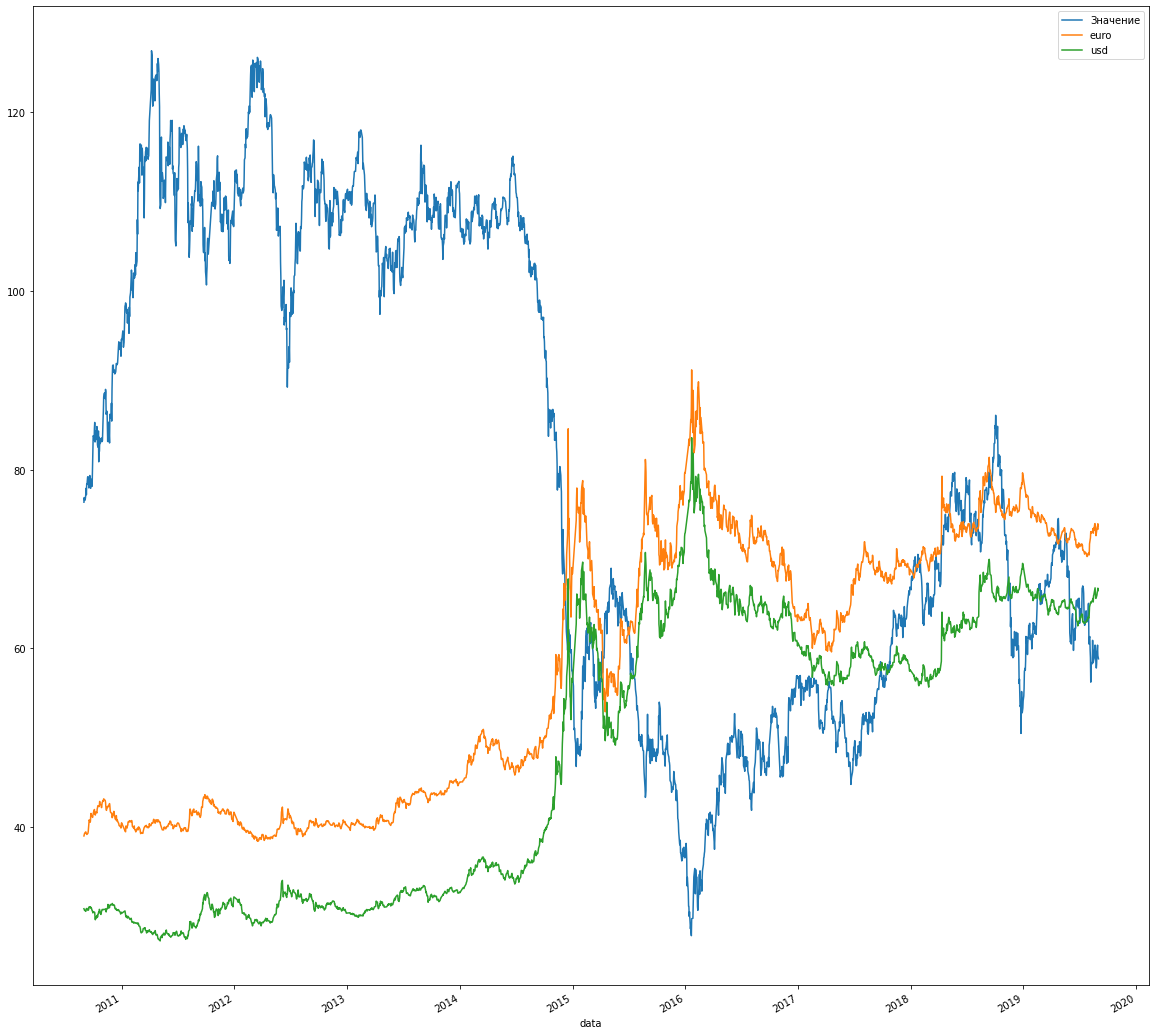

In [6]:
plt.figure(figsize=(20, 20))
data['Значение'].plot()
euro['euro'].plot()
usd['usd'].plot()
plt.legend()
plt.show()

In [7]:
data_f = pd.concat([data, usd, euro], axis=1)


In [8]:
data_f['usd'].fillna(method='ffill', inplace=True)
data_f['euro'].fillna(method='ffill', inplace=True)
# в бренте тоже есть пропуски
data_f['Значение'].fillna(method='ffill', inplace=True)

In [9]:
data_f

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,usd,euro
2010-09-01,76.37,2010.0,9.0,1.0,3.0,244.0,35.0,2.0,0.0,0.0,0.0,30.8669,39.0127
2010-09-02,76.89,2010.0,9.0,2.0,3.0,245.0,35.0,3.0,0.0,0.0,0.0,30.8001,39.1654
2010-09-03,76.57,2010.0,9.0,3.0,3.0,246.0,35.0,4.0,0.0,0.0,0.0,30.6858,39.2901
2010-09-04,76.62,2010.0,9.0,4.0,3.0,247.0,35.0,5.0,0.0,0.0,0.0,30.6922,39.3505
2010-09-05,76.63,2010.0,9.0,5.0,3.0,248.0,35.0,6.0,0.0,1.0,0.0,30.6922,39.3505
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-28,59.84,2019.0,8.0,28.0,3.0,240.0,35.0,2.0,0.0,0.0,0.0,66.2608,73.6091
2019-08-29,60.37,2019.0,8.0,29.0,3.0,241.0,35.0,3.0,0.0,0.0,0.0,66.4127,73.6583
2019-08-30,59.19,2019.0,8.0,30.0,3.0,242.0,35.0,4.0,0.0,0.0,0.0,66.7471,73.9558
2019-08-31,59.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.4897,73.3847


Навели порядок и окончательно сделали ресемплинг и первые разности

In [10]:
data_w = data_f.resample('w').mean()
data_w['d_brent'] = data_w['Значение'].diff(1)
data_w['d'] = data_w['usd'].diff(1)
data_w['e'] = data_w['euro'].diff(1)
data_w.dropna(inplace=True)  
data_w.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,usd,euro,d_brent,d,e
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.000000,0.166667,30.777050,39.302883,1.057333,0.029610,0.069043
2010-09-19,78.590000,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.000000,0.000000,30.887129,39.984557,0.916667,0.110079,0.681674
2010-09-26,78.558571,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.000000,0.000000,31.003800,41.040657,-0.031429,0.116671,1.056100
2010-10-03,81.582857,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.000000,0.000000,30.585086,41.382686,3.024286,-0.418714,0.342029
2010-10-10,84.152857,2010.0,10.000000,6.666667,4.000000,279.666667,40.0,2.666667,0.000000,0.166667,0.000000,30.112129,41.636057,2.570000,-0.472957,0.253371


In [11]:
def split_data_b(df, split_date):
    return df.loc[df.index.get_level_values(df.index.name) <= split_date].copy(), \
           df.loc[df.index.get_level_values(df.index.name) >  split_date].copy()

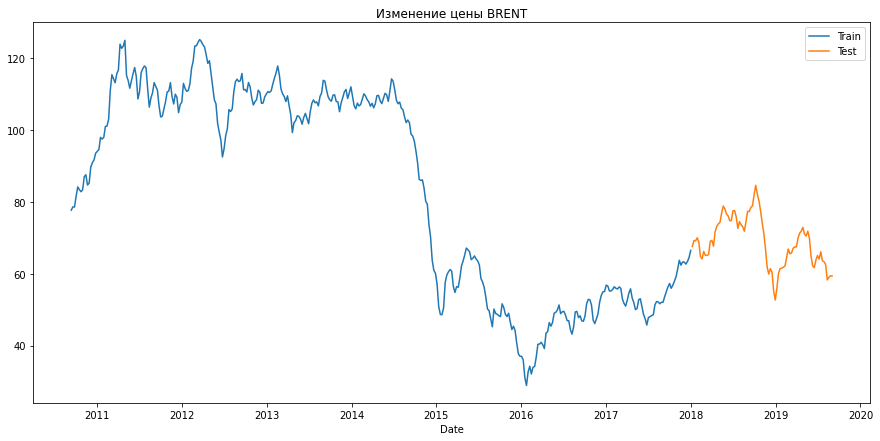

In [12]:
train, test = split_data_b(data_w, '2018-01-01')

plt.figure( figsize=(15, 7))
plt.plot(train.index,train.iloc[:,0], label='Train' )
plt.plot(test.index,test.iloc[:,0], label='Test')
plt.xlabel('Date')
plt.title('Изменение цены BRENT')
plt.legend(loc='best')
plt.show()

In [13]:
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

X_train.shape

(381, 15)

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.neighbors import KNeighborsRegressor

In [15]:
# model_g = GradientBoostingRegressor(max_depth=10, random_state=0, n_estimators=100)

In [16]:
model_g = LinearRegression()

In [17]:
# model_g = RandomForestRegressor()

In [18]:
# model_g = KNeighborsRegressor()

In [19]:
scx= StandardScaler().fit(X_train)
X_train_s = scx.transform(X_train)
X_test_s = scx.transform(X_test)

scy= StandardScaler().fit(y_train.values.reshape(y_train.shape[0], 1))
y_train_s = scy.transform(y_train.values.reshape(y_train.shape[0], 1))
y_test_s = scy.transform(y_test.values.reshape(y_test.shape[0], 1))

model_g.fit(X_train_s, y_train_s)

LinearRegression()

In [21]:
y_test_pred_s = model_g.predict(X_test_s)

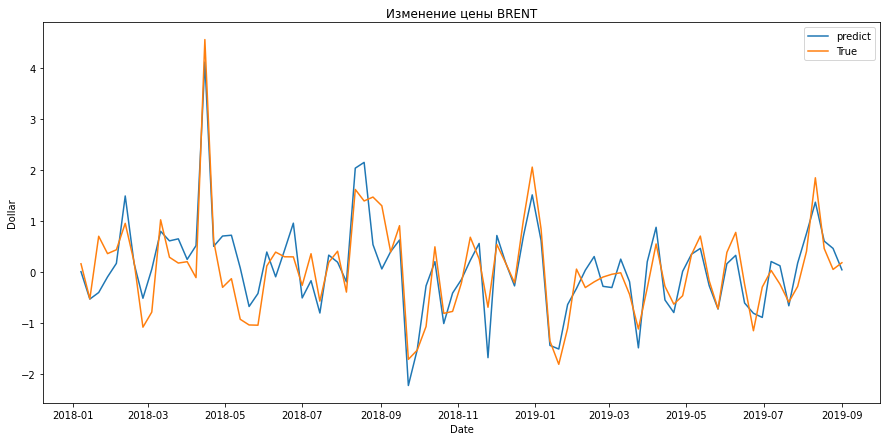

In [22]:
plt.figure( figsize=(15, 7))
plt.plot(test.index,scy.inverse_transform(y_test_pred_s), label='predict' )
plt.plot(test.index,scy.inverse_transform(y_test_s), label='True')
plt.xlabel('Date')
plt.title('Изменение цены BRENT')
plt.ylabel('Dollar')
plt.legend()
plt.show()

In [23]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [24]:
er_g = mean_absolute_percentage_error(y_true=scy.inverse_transform( y_test_s),y_pred = scy.inverse_transform( y_test_pred_s))

print('ошибка линейной регресси:  ', er_g,'%')

ошибка линейной регресси:   136.14023167570605 %


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_test_s, y_test_pred_s),
        mean_squared_error(y_test_s, y_test_pred_s)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_test_s, y_test_pred_s),
        r2_score(y_test_s, y_test_pred_s)))

MSE train: 0.132, test: 0.132
R^2 train: 0.746, test: 0.746
